<a href="https://colab.research.google.com/github/SophieShin/MachineLearning/blob/main/Assignment_2(20248204).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np

In [2]:
# 파일 업로드
from google.colab import files

uploaded = files.upload()


Saving employee_promotion.csv to employee_promotion.csv


In [3]:
# 데이터 살펴보기
import io
df = pd.read_csv(io.BytesIO(uploaded['employee_promotion.csv']), encoding='utf-8', thousands = ',')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [4]:
# 데이터 기초통계
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [5]:
# null값 제거
df=df.dropna()

In [6]:
# categorical data를 one-hot-encoding
train_cat = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, drop_first=True, columns=train_cat)
df

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,0,49,0,False,False,...,False,False,True,False,False,False,True,False,False,True
1,65141,1,30,5.0,4,0,60,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,7513,1,34,3.0,7,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2542,2,39,1.0,10,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,48945,1,45,3.0,2,0,73,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,2,31,1.0,2,0,49,0,False,False,...,False,False,False,False,False,False,False,True,False,False
54803,3030,1,48,3.0,17,0,78,0,False,False,...,False,False,False,False,False,False,False,True,False,True
54804,74592,1,37,2.0,6,0,56,0,False,False,...,False,False,False,False,False,False,True,False,False,False
54805,13918,1,27,5.0,3,0,79,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [7]:
# 데이터 칼럼 확인
df.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_

In [8]:
# 불필요한 feature 삭제
df = df.drop(labels='employee_id',axis=1)
df

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,0,49,0,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1,1,30,5.0,4,0,60,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,34,3.0,7,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2,39,1.0,10,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1,45,3.0,2,0,73,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,2,31,1.0,2,0,49,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
54803,1,48,3.0,17,0,78,0,False,False,False,...,False,False,False,False,False,False,False,True,False,True
54804,1,37,2.0,6,0,56,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
54805,1,27,5.0,3,0,79,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [9]:
# Feature/Target 분리
df_data = df.drop(labels= 'is_promoted', axis = 1).to_numpy()
df_target = df['is_promoted'].to_numpy()

In [10]:
# train/test data 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    df_data, df_target, test_size=0.3, random_state=42)

In [25]:
#7:3 분리 확인
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(34062, 52) (34062,)
(14598, 52) (14598,)


In [26]:
# Logistic regession 학습 및 테스트
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9198813927543891
0.9151938621729004


In [27]:
# 학습한 모델이 예측한 사항
y_pred_train = lr.predict(train_input)
y_pred_test = lr.predict(test_input)

In [28]:
# Confusion Matrix 만들기_train model
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target, y_pred_train)

array([[30995,   154],
       [ 2575,   338]])

In [29]:
# Confusion Matrix 만들기_test model
confusion_matrix(test_target, y_pred_test)

array([[13214,    65],
       [ 1173,   146]])

In [30]:
# 모델의 성능 검증
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

lr_train_acc = accuracy_score(train_target, y_pred_train)
lr_test_acc = accuracy_score(test_target, y_pred_test)
print(f"Training Data Accuracy Score: {train_acc:.3f}\nTesting Data Accuracy Score: {test_acc:.3f}")

lr_train_recall = recall_score(train_target, y_pred_train)
lr_test_recall = recall_score(test_target, y_pred_test)
print(f"Training Data recall Score: {train_recall:.3f}\nTesting Data recall Score: {test_recall:.3f}")

lr_train_precision = precision_score(train_target, y_pred_train)
lr_test_precision = precision_score(test_target, y_pred_test)
print(f"Training Data Precesion Score: {train_precision:.3f}\nTesting Data Precision Score: {test_precision:.3f}")

lr_train_f1 = f1_score(train_target, y_pred_train)
lr_test_f1 = f1_score(test_target, y_pred_test)
print(f"Training Data f1_score Score: {train_f1:.3f}\nTesting Data f1_score Score: {test_f1:.3f}")

Training Data Accuracy Score: 1.000
Testing Data Accuracy Score: 0.885
Training Data recall Score: 0.997
Testing Data recall Score: 0.395
Training Data Precesion Score: 1.000
Testing Data Precision Score: 0.373
Training Data f1_score Score: 0.998
Testing Data f1_score Score: 0.384


In [31]:
# Decision tree 모형 학습
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9997064177088838
0.8853267570900123


In [32]:
# 학습한 모델이 예측한 사항, Confusion Matrix 만들기_train model

y_pred_train = dt.predict(train_input)
y_pred_test = dt.predict(test_input)
confusion_matrix(train_target, y_pred_train)

array([[31149,     0],
       [   10,  2903]])

In [33]:
# Confusion Matrix 만들기_test model

confusion_matrix(test_target, y_pred_test)

array([[12403,   876],
       [  798,   521]])

In [34]:
# 모델의 성능 검증
dt_train_acc = accuracy_score(train_target, y_pred_train)
dt_test_acc = accuracy_score(test_target, y_pred_test)
print(f"Training Data Accuracy Score: {train_acc:.3f}\nTesting Data Accuracy Score: {test_acc:.3f}")

dt_train_recall = recall_score(train_target, y_pred_train)
dt_test_recall = recall_score(test_target, y_pred_test)
print(f"Training Data recall Score: {train_recall:.3f}\nTesting Data recall Score: {test_recall:.3f}")

dt_train_precision = precision_score(train_target, y_pred_train)
dt_test_precision = precision_score(test_target, y_pred_test)
print(f"Training Data Precesion Score: {train_precision:.3f}\nTesting Data Precision Score: {test_precision:.3f}")

dt_train_f1 = f1_score(train_target, y_pred_train)
dt_test_f1 = f1_score(test_target, y_pred_test)
print(f"Training Data f1_score Score: {train_f1:.3f}\nTesting Data f1_score Score: {test_f1:.3f}")

Training Data Accuracy Score: 1.000
Testing Data Accuracy Score: 0.885
Training Data recall Score: 0.997
Testing Data recall Score: 0.395
Training Data Precesion Score: 1.000
Testing Data Precision Score: 0.373
Training Data f1_score Score: 0.998
Testing Data f1_score Score: 0.384


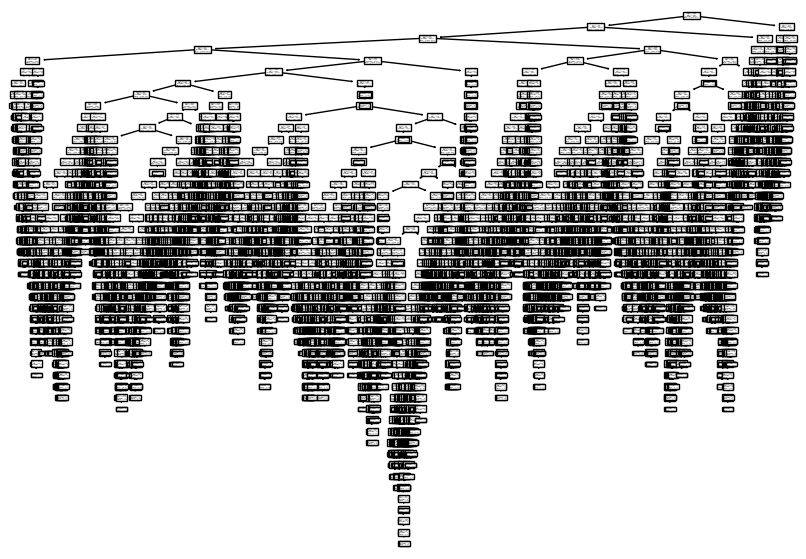

In [ ]:
# Decision Tree plot 그려보기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [35]:
# KNN 학습하기
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)


knn.fit(train_input, train_target)

print(knn.score(train_input, train_target))
print(knn.score(test_input, test_target))

0.9367917327226821
0.9117002329086176


In [36]:
# 학습한 모델이 예측한 사항, Confusion Matrix 만들기_train model

y_pred_train = dt.predict(train_input)
y_pred_test = dt.predict(test_input)
confusion_matrix(train_target, y_pred_train)

array([[31149,     0],
       [   10,  2903]])

In [37]:
# Confusion Matrix 만들기_test model

confusion_matrix(test_target, y_pred_test)

array([[12403,   876],
       [  798,   521]])

In [38]:
# 모델의 성능 검증
knn_train_acc = accuracy_score(train_target, y_pred_train)
knn_test_acc = accuracy_score(test_target, y_pred_test)
print(f"Training Data Accuracy Score: {train_acc:.3f}\nTesting Data Accuracy Score: {test_acc:.3f}")

knn_train_recall = recall_score(train_target, y_pred_train)
knn_test_recall = recall_score(test_target, y_pred_test)
print(f"Training Data recall Score: {train_recall:.3f}\nTesting Data recall Score: {test_recall:.3f}")

knn_train_precision = precision_score(train_target, y_pred_train)
knn_test_precision = precision_score(test_target, y_pred_test)
print(f"Training Data Precesion Score: {train_precision:.3f}\nTesting Data Precision Score: {test_precision:.3f}")

knn_train_f1 = f1_score(train_target, y_pred_train)
knn_test_f1 = f1_score(test_target, y_pred_test)
print(f"Training Data f1_score Score: {train_f1:.3f}\nTesting Data f1_score Score: {test_f1:.3f}")

Training Data Accuracy Score: 1.000
Testing Data Accuracy Score: 0.885
Training Data recall Score: 0.997
Testing Data recall Score: 0.395
Training Data Precesion Score: 1.000
Testing Data Precision Score: 0.373
Training Data f1_score Score: 0.998
Testing Data f1_score Score: 0.384


In [40]:
score_data = { 'Train/Test' : ['Training', 'Test'],
              'Logistic Regression_Accuracy' : [lr_train_acc, lr_test_acc],
               'Logistic_regression_Recall' : [lr_train_recall, lr_test_recall],
               'Logistic_regression_Precision': [lr_train_precision, lr_test_precision],
               'Logistic_regression_F1' : [lr_train_f1, lr_test_f1],
               'DecisionTree_Accuracy' : [dt_train_acc, dt_test_acc],
               'DecisionTree_Recall' : [dt_train_recall, dt_test_recall],
               'DecisionTree_Precision': [dt_train_precision, dt_test_precision],
               'DecisionTree_F1' : [dt_train_f1, dt_test_f1],
                'KNN_Accuracy' : [knn_train_acc, knn_test_acc],
               'KNN_Recall' : [knn_train_recall, knn_test_recall],
               'KNN_Precision': [knn_train_precision, knn_test_precision],
               'KNN_F1' : [knn_train_f1, knn_test_f1],

}

score_data_frame = pd.DataFrame(score_data)
score_data_frame.set_index('Train/Test')
score_data_frame

,Train/Test,Logistic Regression_Accuracy,Logistic_regression_Recall,Logistic_regression_Precision,Logistic_regression_F1,DecisionTree_Accuracy,DecisionTree_Recall,DecisionTree_Precision,DecisionTree_F1,KNN_Accuracy,KNN_Recall,KNN_Precision,KNN_F1
0,Training,0.919881,0.116032,0.686992,0.198532,0.999706,0.996567,1.000000,0.998281,0.999706,0.996567,1.000000,0.998281
1,Test,0.915194,0.110690,0.691943,0.190850,0.885327,0.394996,0.372942,0.383652,0.885327,0.394996,0.372942,0.383652
